<a href="https://colab.research.google.com/github/chitranshi135/AI_Lab9_ZORO.AI/blob/main/BinaryBandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Binary Bandit

In [1]:
import random
import matplotlib.pyplot as plt
random.seed(0)
# --- Bandit ---
class BinaryBandit(object):
  p = [0]*2
  def __init__(self):
    # N = number of arms
    self.N = 2
    for i in range(0,self.N):
      self.p[i] = random.random()
  def actions(self):
    result = []
    for i in range(0,self.N):
      result.append(i)
    return result
  def reward(self, action):
    rand = random.random()
    if rand < self.p[action]:
      return 1
    else:
      return 0


In [2]:
def eGreedy_binary(myBandit, epsilon, max_iteration):
  # Initialization 
  Q = [0]*myBandit.N 
  count = [0]*myBandit.N
  r = 0
  R = []
  R_avg = [0]*1
  # Incremental Implementation
  for iter in range(1,max_iteration+1):
    if random.random() > epsilon:
      action = Q.index(max(Q)) # Exploit/ Greed
    else:
      action = random.choice(myBandit.actions()) # Explore
    r = myBandit.reward(action)
    R.append(r)
    count[action] = count[action]+1
    Q[action] = Q[action]+(r - Q[action])/count[action]
    R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)
    if iter == max_iteration:
      print("Final Counts for move 1:", count[0])
      print("Final Counts for move 2:", count[1])

      actionTaken = ["1", "2"]
      # Create bar plot
      plt.bar(actionTaken, count)

      # Set plot title and axis labels
      plt.title("Number of times each action taken")
      plt.xlabel("Action")
      plt.ylabel("Count")

      # Show plot
      plt.show()

  return Q, R_avg, R

Final Counts for move 1: 113
Final Counts for move 2: 1887


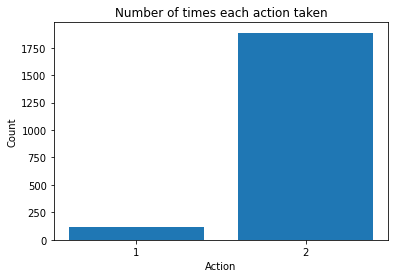

******************        RESULTS FOR BANDIT A         *************************
Observed Average Reward over 2000 experiments for action 1: 0.17699115044247793
Observed Average Reward over 2000 experiments for action 2: 0.5437201907790153
----------------------------------------------------------------------------------
Actual Reward for action 1: 0.23796462709189137
Actual Reward for action 2: 0.5442292252959519
**********************************************************************************


In [3]:
random.seed(3)
myBanditA = BinaryBandit()
Q, R_avg, R = eGreedy_binary(myBanditA, 0.1, 2000)
print("******************        RESULTS FOR BANDIT A         *************************")

print("Observed Average Reward over 2000 experiments for action 1:", Q[0])
print("Observed Average Reward over 2000 experiments for action 2:", Q[1])
print("----------------------------------------------------------------------------------")
print("Actual Reward for action 1:",myBanditA.p[0])
print("Actual Reward for action 2:",myBanditA.p[1])

print("**********************************************************************************")

Text(0, 0.5, 'Reward')

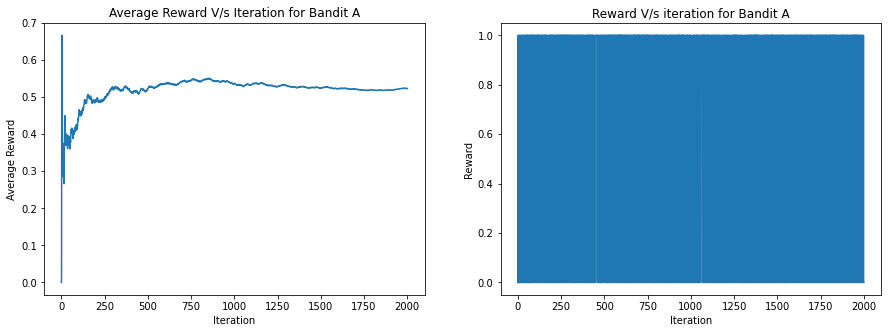

In [4]:

# display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(R_avg)
ax1.title.set_text("Average Reward V/s Iteration for Bandit A")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Average Reward")
ax2.plot(R)
ax2.title.set_text("Reward V/s iteration for Bandit A")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Reward")
    

Final Counts for move 1: 1884
Final Counts for move 2: 116


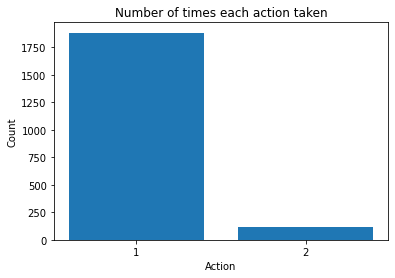

************************        RESULTS FOR BANDIT B         ******************************
Observed Average Reward over 2000 experiments for action 1: 0.48885350318471305
Observed Average Reward over 2000 experiments for action 2: 0.33620689655172414
---------------------------------------------------------------------------------------------
Actual Reward for action 1: 0.46300735781502145
Actual Reward for action 2: 0.37331193139504204
**********************************************************************************************


In [5]:
random.seed(9)
myBanditB = BinaryBandit()
Q, R_avg, R = eGreedy_binary(myBanditB, 0.1, 2000)
print("************************        RESULTS FOR BANDIT B         ******************************")

print("Observed Average Reward over 2000 experiments for action 1:", Q[0])
print("Observed Average Reward over 2000 experiments for action 2:", Q[1])
print("---------------------------------------------------------------------------------------------")
print("Actual Reward for action 1:",myBanditB.p[0])
print("Actual Reward for action 2:",myBanditB.p[1])

print("**********************************************************************************************")

Text(0, 0.5, 'Reward')

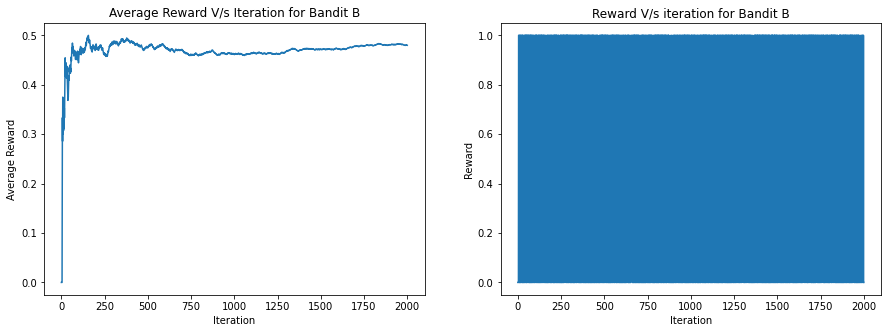

In [6]:

# display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(R_avg)
ax1.title.set_text("Average Reward V/s Iteration for Bandit B")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Average Reward")
ax2.plot(R)
ax2.title.set_text("Reward V/s iteration for Bandit B")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Reward")